# Padmaja 19BAI1107 - Linear Regression 3a

**Importing libraries**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

**Reading the csv file Admissions_Predict( dataset taken from kaggle : Graduate Admission 2 )**

In [5]:
df = pd.read_csv('Admission_Predict.csv')

**First 5 rows of dataset**

In [7]:
df.head()

Serial No.  GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  \
0           1        337          118                  4  4.5   4.5  9.65   
1           2        324          107                  4  4.0   4.5  8.87   
2           3        316          104                  3  3.0   3.5  8.00   
3           4        322          110                  3  3.5   2.5  8.67   
4           5        314          103                  2  2.0   3.0  8.21   

   Research  Chance of Admit   
0         1              0.92  
1         1              0.76  
2         1              0.72  
3         1              0.80  
4         0              0.65

**Consice summary of dataframe**

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         400 non-null    int64  
 1   GRE Score          400 non-null    int64  
 2   TOEFL Score        400 non-null    int64  
 3   University Rating  400 non-null    int64  
 4   SOP                400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    int64  
 8   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 28.2 KB


**Basic statistical details of dataframe**

In [9]:
df.describe()

Serial No.   GRE Score  TOEFL Score  University Rating         SOP  \
count  400.000000  400.000000   400.000000         400.000000  400.000000   
mean   200.500000  316.807500   107.410000           3.087500    3.400000   
std    115.614301   11.473646     6.069514           1.143728    1.006869   
min      1.000000  290.000000    92.000000           1.000000    1.000000   
25%    100.750000  308.000000   103.000000           2.000000    2.500000   
50%    200.500000  317.000000   107.000000           3.000000    3.500000   
75%    300.250000  325.000000   112.000000           4.000000    4.000000   
max    400.000000  340.000000   120.000000           5.000000    5.000000   

             LOR         CGPA    Research  Chance of Admit   
count  400.000000  400.000000  400.000000        400.000000  
mean     3.452500    8.598925    0.547500          0.724350  
std      0.898478    0.596317    0.498362          0.142609  
min      1.000000    6.800000    0.000000          0.340000  
25%      3.000000    8.170000    0.000000          0.640000  
50%      3.500000    8.610000    1.000000          0.730000  
75%      4.000000    9.062500    1.000000          0.830000  
max      5.000000    9.920000    1.000000          0.970000

**Columns in dataframe**

In [11]:
df.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

**Plotting multiple distributions in the dataset**

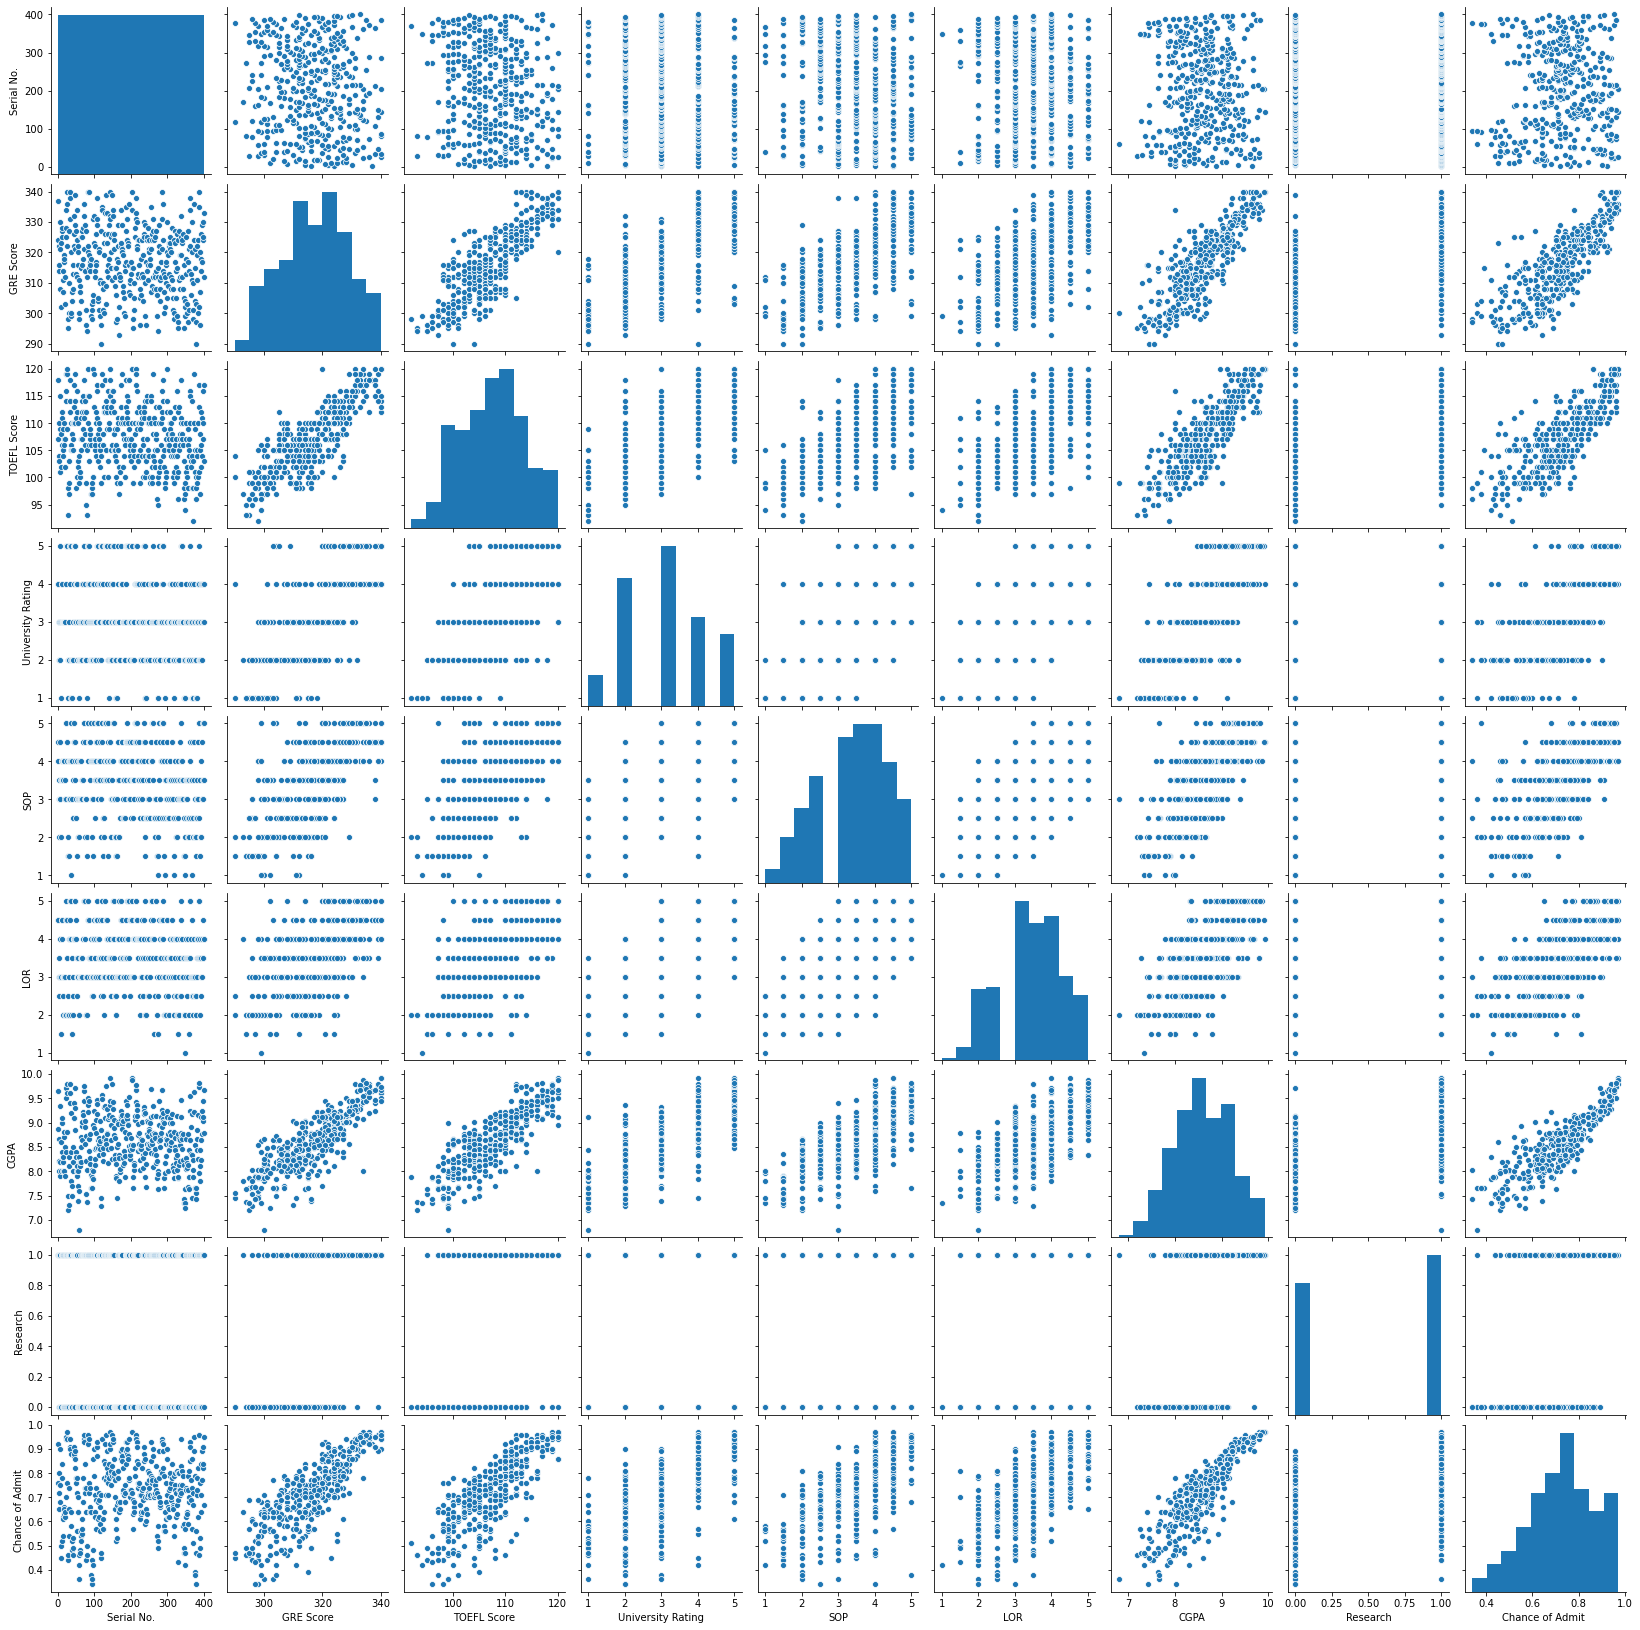

In [12]:
sns.pairplot(df)

**A distplot of GRE Scores**

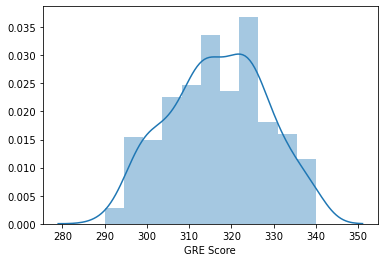

In [15]:
sns.distplot(df['GRE Score'])

**Heatmap**

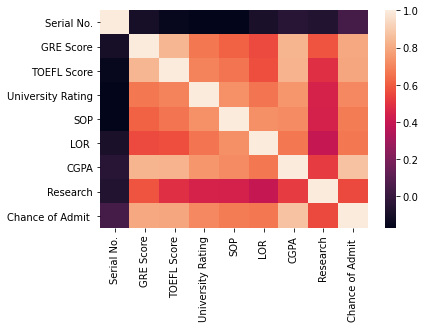

In [16]:
sns.heatmap(df.corr())

**Training a Linear Regression Model**

In [18]:
X = df[['GRE Score', 'TOEFL Score', 'University Rating',
               'SOP', 'CGPA']]
Y = df['Chance of Admit ']

In [19]:
X

GRE Score  TOEFL Score  University Rating  SOP  CGPA
0          337          118                  4  4.5  9.65
1          324          107                  4  4.0  8.87
2          316          104                  3  3.0  8.00
3          322          110                  3  3.5  8.67
4          314          103                  2  2.0  8.21
..         ...          ...                ...  ...   ...
395        324          110                  3  3.5  9.04
396        325          107                  3  3.0  9.11
397        330          116                  4  5.0  9.45
398        312          103                  3  3.5  8.78
399        333          117                  4  5.0  9.66

[400 rows x 5 columns]

In [20]:
Y

0      0.92
1      0.76
2      0.72
3      0.80
4      0.65
       ... 
395    0.82
396    0.84
397    0.91
398    0.67
399    0.95
Name: Chance of Admit , Length: 400, dtype: float64

**Split the data into training / testing set**

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=101)

**Building the Model**

In [23]:
from sklearn.linear_model import LinearRegression

In [24]:
model = LinearRegression()

In [25]:
model.fit(X_train,y_train)

LinearRegression()

**Model Evaluation**

In [26]:
print(model.intercept_)

-1.4658766449225609


#### Inference : From this we can see that the model has a negative intercept

In [27]:
coeff_df = pd.DataFrame(model.coef_,X.columns,columns=['Coefficient'])
coeff_df

Coefficient
GRE Score             0.002564
TOEFL Score           0.002760
University Rating     0.013078
SOP                   0.008195
CGPA                  0.118029

In [28]:
model.coef_

array([0.00256433, 0.00275981, 0.0130784 , 0.00819522, 0.11802867])

In [35]:
model.score(X_test,y_test)

0.7139621110334087

#### Inference : by finding the score of the model we can determine its accuracy....Thus we can say that this model is about 71% accurate

**Predictions from our Mode**

In [29]:
predictions = model.predict(X_test)

**Scatter plot**

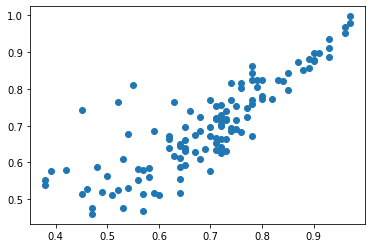

In [30]:
plt.scatter(y_test,predictions)

**Inference : From this we can see that as one variable increases so does the other...thus a positive correlation**

**Distplot**

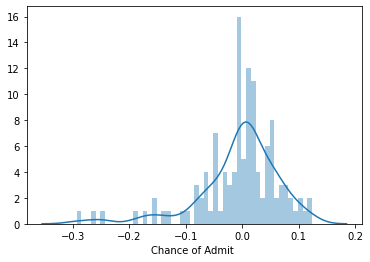

In [31]:
sns.distplot((y_test-predictions),bins=50);

**Regression Evaluation Metrics**

In [32]:
from sklearn import metrics

In [33]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 0.049799466715867595
MSE: 0.005266307137739238
RMSE: 0.07256932642473153


#### Inference : Here the mean absolute error, mean square error, root mean square error are all very less